In [1]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 50 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=60e1edde60fd00c553553c0b23bb1647dd580a62d391e1b2178e6feeb8e47cb6
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj_5mtyxp
  JVM stdout: /tmp/tmpj_5mtyxp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj_5mtyxp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_q0dwa4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
df = h2o.import_file(path='/content/drive/MyDrive/Colab Notebooks/HACKATHON NOV22/MODEL2 - H2O train test split + balance/train_time_to_seconds.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.describe(chunk_summary=True)

Rows:54330
Cols:9

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
CBS           Binary                     8        11.1111             7.2 KB    0.704388
C1N           1-Byte Integers (w/o NAs)  24       33.3333             160.8 KB  15.7658
C2            2-Byte Integers            4        5.55556             53.5 KB   5.24704
C2S           2-Byte Fractions           12       16.6667             160.0 KB  15.6883
C4            4-Byte Integers            24       33.3333             638.3 KB  62.5945

Frame distribution summary: 
                 size       number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ---------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  1019.7 KB  54330             8                              72
mean             1019.7 KB  54330             8                              72
min              1019.7 KB  54330             8                              72
max              1019.7 KB  54330             8                              72
stddev           0  B       0                 0                              0
total            1019.7 KB  54330             8                              72

,C1,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
type,int,int,int,enum,int,enum,int,real,enum
mins,0.0,31503775.0,0.0,,190.0,,1.0,0.0,
mean,27164.5,32782665.2778207,60789.98459414692,,41609.384980673596,,2.8157923799006097,9.838135652494024,
maxs,54329.0,33560846.0,86399.0,,75236.0,,39.0,221.48,
sigma,15683.864399439317,445940.2449231192,15636.502444001295,,21903.26714067566,,2.4309358106795838,9.260352396740208,
zeros,1,0,1,,0,,0,3,
missing,0,0,0,0,0,0,0,0,0
0,0.0,33446280.0,51069.0,AR,55379.0,PAID,2.0,11.88,DeliveredStatus
1,1.0,33107339.0,42461.0,GT,23487.0,PAID,2.0,5.2,DeliveredStatus
2,2.0,32960645.0,42833.0,CR,62229.0,PAID,1.0,6.03,DeliveredStatus


In [7]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [8]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		            seed =1)

In [10]:
aml.train( y = 'final_status', training_frame = train, validation_frame = test)

AutoML progress: |
15:19:19.607: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221113_151919

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0710204258424563
RMSE: 0.26649657754360806
LogLoss: 0.24549964210625377
AUC: 0.9340478790852929
AUCPR: 0.9910845017542226
Gini: 0.8680957581705857
Null degrees of freedom: 9983
Residual degrees of freedom: 9965
Null deviance: 6919.414984515737
Residual deviance: 4902.136853577676
AIC: 4940.136853577676

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7496681527344845
                 CanceledStatus    DeliveredStatus    Error    Rate
---------------  ----------------  -----------------  -------  --------------
CanceledStatus   473               625                0.5692   (625.0/1098.0)
DeliveredStatus  162               8724               0.0182   (162.0/8886.0)
Total            635               9349               0.0788   (787.0/9984.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.749668     0.956841  255
max f2                       0.602021     0.978285  318
max f0point5                 0.832061     0.956783  199
max accuracy                 0.749668     0.921174  255
max precision                0.987167     1         0
max recall                   0.242381     1         390
max specificity              0.987167     1         0
max absolute_mcc             0.831177     0.578491  200
max min_per_class_accuracy   0.865959     0.852577  167
max mean_per_class_accuracy  0.876366     0.861604  155
max tns                      0.987167     1098      0
max fns                      0.987167     8882      0
max fps                      0.0955986    1098      399
max tps                      0.242381     8886      390
max tnr                      0.987167     1         0
max fnr                      0.987167     0.99955   0
max fpr                      0.0955986    1         399
max tpr                      0.242381     1         390

Gains/Lift Table: Avg response rate: 89.00 %, avg score: 88.94 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010016                    0.974436           1.12357   1.12357            1                0.97915   1                           0.97915             0.0112537       0.0112537                  12.3565   12.3565            0.0112537
2        0.0200321                   0.970674           1.12357   1.12357            1                0.972514  1                           0.975832            0.0112537       0.0225073                  12.3565   12.3565            0.0225073
3        0.0300481                   0.968428           1.12357   1.12357            1                0.969495  1                           0.97372             0.0112537       0.033761                   12.3565   12.3565            0.033761
4        0.0400641                   0.966292           1.12357   1.12357            1                0.967289  1                           0.972112            0.0112537       0.0450146                  12.3565   12.3565            0.0450146
5        0.0500801                   0.964175           1.12357   1.12357            1                0.965265  1                           0.970742            0.0112537       0.0562683                  12.3565   12.3565            0.0562683
6        0.10006                     0.9563

In [15]:
h2o.export_file(aml.leaderboard, "metrics.csv", force = True, parts = 1)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20221110_91618,0.692495,0.312722,0.942456,0.487935,0.297819,0.088696
StackedEnsemble_BestOfFamily_1_AutoML_1_20221110_91618,0.691007,0.312924,0.942206,0.486367,0.297853,0.0887162
GBM_grid_1_AutoML_1_20221110_91618_model_4,0.672839,0.324363,0.938791,0.496986,0.303007,0.0918134
GBM_1_AutoML_1_20221110_91618,0.669496,0.321247,0.935988,0.489191,0.301163,0.0906994
XGBoost_grid_1_AutoML_1_20221110_91618_model_1,0.667081,0.321564,0.935681,0.495557,0.30123,0.0907394
XGBoost_3_AutoML_1_20221110_91618,0.663863,0.552915,0.934544,0.495154,0.430556,0.185379
GBM_2_AutoML_1_20221110_91618,0.661041,0.321669,0.932378,0.485574,0.301572,0.0909455
XGBoost_grid_1_AutoML_1_20221110_91618_model_3,0.660427,0.323549,0.93332,0.492115,0.301801,0.0910835
XGBoost_grid_1_AutoML_1_20221110_91618_model_2,0.659693,0.324177,0.933511,0.49379,0.302641,0.0915914
GBM_3_AutoML_1_20221110_91618,0.657567,0.323009,0.931354,0.492909,0.302046,0.0912319


In [16]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221113_151919

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0710204258424563
RMSE: 0.26649657754360806
LogLoss: 0.24549964210625377
AUC: 0.9340478790852929
AUCPR: 0.9910845017542226
Gini: 0.8680957581705857
Null degrees of freedom: 9983
Residual degrees of freedom: 9965
Null deviance: 6919.414984515737
Residual deviance: 4902.136853577676
AIC: 4940.136853577676

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7496681527344845
                 CanceledStatus    DeliveredStatus    Error    Rate
---------------  ----------------  -----------------  -------  --------------
CanceledStatus   473               625                0.5692   (625.0/1098.0)
DeliveredStatus  162               8724               0.0182   (162.0/8886.0)
Total            635               9349               0.0788   (787.0/9984.0)

Maximum Me

In [21]:
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.09364442313475058
RMSE: 0.30601376298256683
LogLoss: 0.3289408272766213
AUC: 0.6590817572269507
AUCPR: 0.9320145476194512
Gini: 0.31816351445390145
Null degrees of freedom: 10858
Residual degrees of freedom: 10840
Null deviance: 7546.122357623936
Residual deviance: 7143.936886793661
AIC: 7181.936886793661

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45415511607114456
                 CanceledStatus    DeliveredStatus    Error    Rate
---------------  ----------------  -----------------  -------  ----------------
CanceledStatus   17                1182               0.9858   (1182.0/1199.0)
DeliveredStatus  9                 9651               0.0009   (9.0/9660.0)
Total            26                10833              0.1097   (1191.0/10859.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.454155     0.941883  377
max f2                       0.077581     0.975777  399
max f0point5                 0.729909     0.913398  298
max accuracy                 0.454155     0.890321  377
max precision                0.9869       1         0
max recall                   0.077581     1         399
max specificity              0.9869       1         0
max absolute_mcc             0.805827     0.184834  248
max min_per_class_accuracy   0.903988     0.613011  126
max mean_per_class_accuracy  0.901004     0.617006  131
max tns                      0.9869       1199      0
max fns                      0.9869       9656      0
max fps                      0.183815     1199      398
max tps                      0.077581     9660      399
max tnr                      0.9869       1         0
max fnr                      0.9869       0.999586  0
max fpr                      0.183815     1         398
max tpr                      0.077581     1         399

Gains/Lift Table: Avg response rate: 88.96 %, avg score: 89.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100378                   0.973967           1.10349   1.10349            0.981651         0.97837   0.981651                    0.97837             0.0110766       0.0110766                  10.3494    10.3494            0.00940855
2        0.0200755                   0.969269           1.08287   1.09318            0.963303         0.971393  0.972477                    0.974881            0.0108696       0.0219462                  8.2868     9.3181             0.016942
3        0.0300212                   0.966256           1.08249   1.08964            0.962963         0.967748  0.969325                    0.972518            0.010766        0.0327122                  8.2486     8.96379            0.0243719
4        0.0400589                   0.963889           1.07255   1.08536            0.954128         0.965061  0.965517                    0.970649            0.010766        0.0434783                  7.25549    8.53573            0.0309678
5        0.0500046                   0.961913           1.08249   1.08479            0.962963         0.962936  0.965009                    0.969115            0.010766        0.0542443                  8.2486     8.47862            0.0383978
6        0.100009                    0.954286           1.05994   1.07237            0.94291          0.957851  0.953959                    0.963483            0.0530021       0.107246            

In [22]:
model_path = h2o.save_model(model=best_model,path='/content/drive/MyDrive/Colab Notebooks/HACKATHON NOV22/MODEL2 - H2O train test split + balance/model2', force=True)
print(model_path)

/content/drive/MyDrive/Colab Notebooks/HACKATHON NOV22/MODEL2 - H2O train test split + balance/model2/StackedEnsemble_AllModels_1_AutoML_1_20221113_151919


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20221113_151919,0.659082,0.328941,0.932015,0.493377,0.306014,0.0936444,75123,0.281388,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20221113_151919,0.654218,0.329635,0.930144,0.496454,0.306152,0.093729,26868,0.145874,StackedEnsemble
GBM_1_AutoML_1_20221113_151919,0.642787,0.335946,0.928087,0.489934,0.308174,0.0949713,4170,0.017731,GBM
XGBoost_3_AutoML_1_20221113_151919,0.642212,0.546518,0.927418,0.496871,0.427301,0.182586,26378,0.02068,XGBoost
XGBoost_grid_1_AutoML_1_20221113_151919_model_1,0.641483,0.335387,0.927657,0.492333,0.307937,0.0948254,4241,0.007014,XGBoost
XGBoost_grid_1_AutoML_1_20221113_151919_model_3,0.639596,0.336661,0.92595,0.495985,0.308074,0.0949098,7634,0.006424,XGBoost
GBM_2_AutoML_1_20221113_151919,0.637727,0.334137,0.927436,0.492281,0.308241,0.0950125,3241,0.012604,GBM
GBM_3_AutoML_1_20221113_151919,0.635154,0.335405,0.92621,0.493221,0.308336,0.0950714,3464,0.013125,GBM
XGBoost_grid_1_AutoML_1_20221113_151919_model_2,0.634778,0.337429,0.924914,0.492646,0.308928,0.0954363,4633,0.005492,XGBoost
GBM_4_AutoML_1_20221113_151919,0.633608,0.336713,0.922509,0.494107,0.308825,0.0953727,2696,0.018867,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20221113_151919

,CanceledStatus,DeliveredStatus,Error,Rate
CanceledStatus,17.0,1182.0,0.9858,(1182.0/1199.0)
DeliveredStatus,9.0,9651.0,0.0009,(9.0/9660.0)
Total,26.0,10833.0,0.1097,(1191.0/10859.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

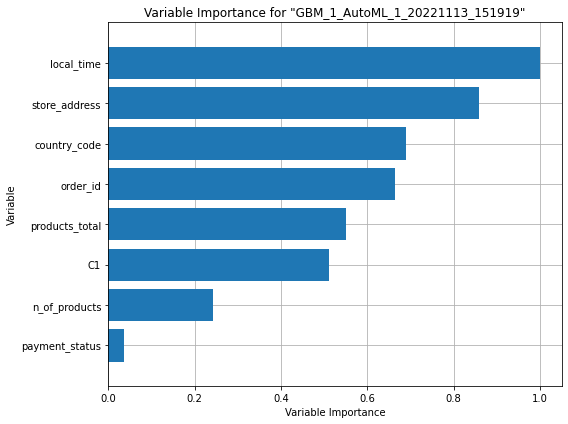

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

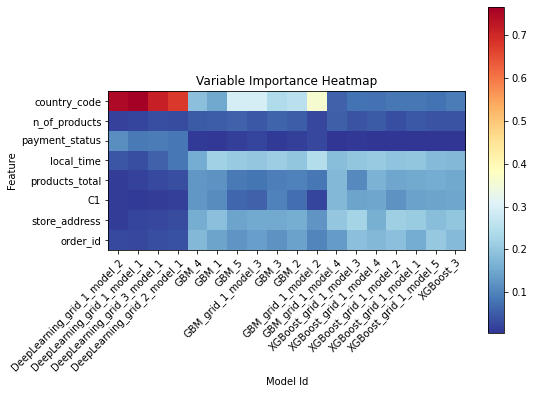

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

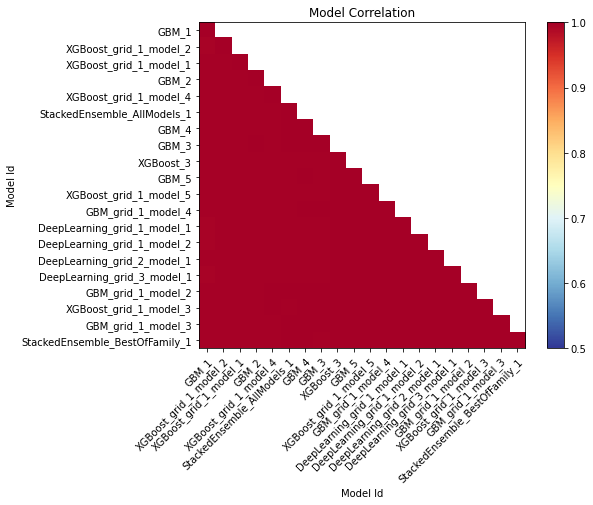

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

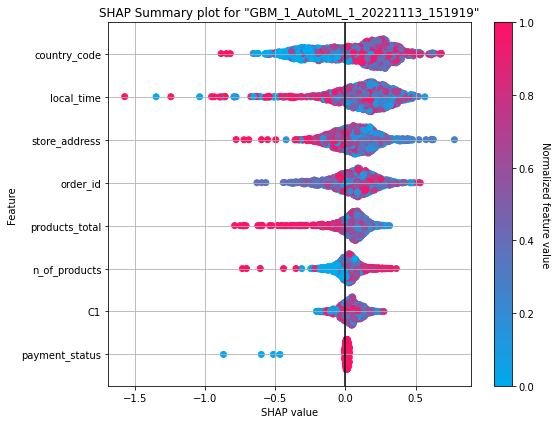

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

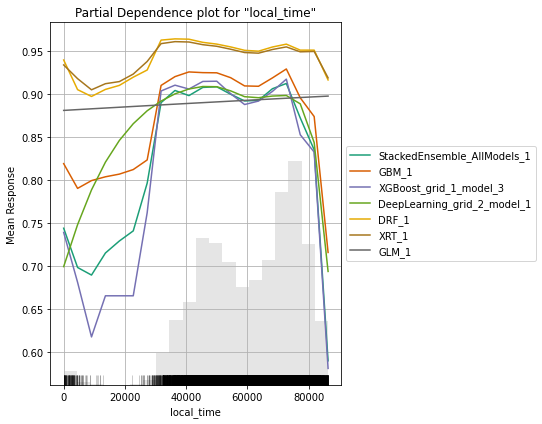

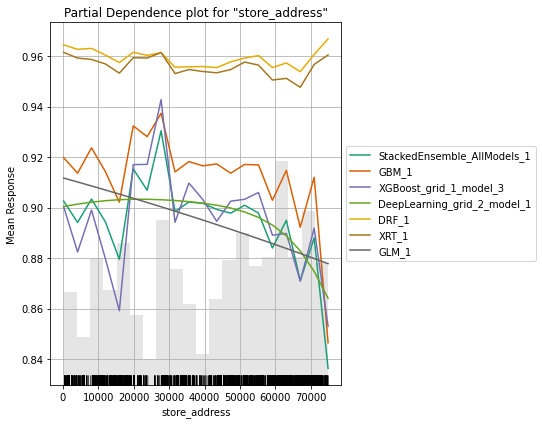

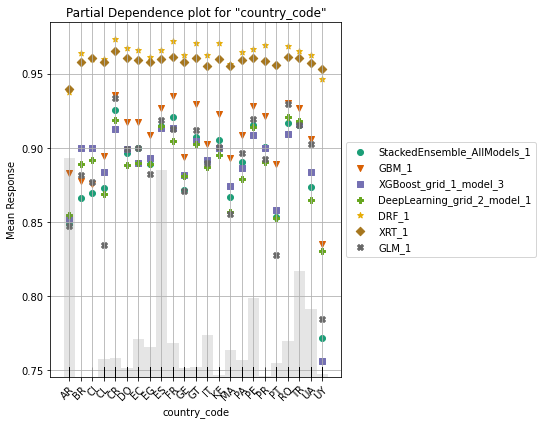

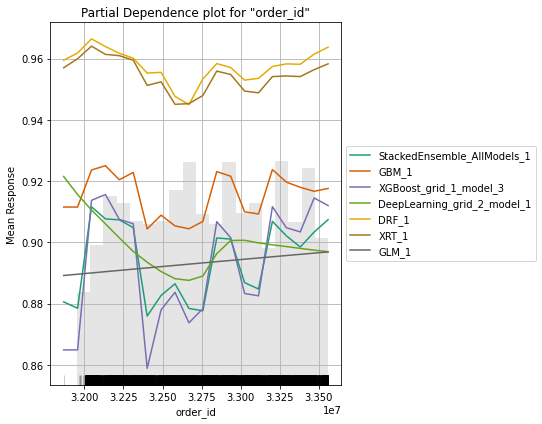

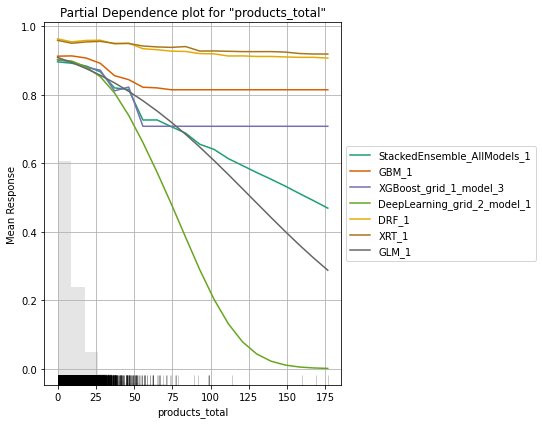

In [23]:
explain_model = aml.explain(frame = test, figsize = (8,6))

In [24]:
test_data = h2o.import_file("/content/drive/MyDrive/Colab Notebooks/HACKATHON NOV22/MODEL2 - H2O train test split + balance/test_X_seconds.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
aml.predict(test_data)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,CanceledStatus,DeliveredStatus
DeliveredStatus,0.421486,0.578514
DeliveredStatus,0.0376883,0.962312
DeliveredStatus,0.110537,0.889463
DeliveredStatus,0.11295,0.88705
DeliveredStatus,0.0286782,0.971322
DeliveredStatus,0.0330914,0.966909
DeliveredStatus,0.0834181,0.916582
DeliveredStatus,0.0678544,0.932146
DeliveredStatus,0.341702,0.658298
DeliveredStatus,0.0595198,0.94048


In [26]:
get_aml = h2o.automl.get_automl(aml.project_name)

In [27]:
h2o_frame = get_aml.predict(test_data)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [28]:
prediction = h2o_frame.as_data_frame()

In [29]:
prediction.to_csv("/content/drive/MyDrive/Colab Notebooks/HACKATHON NOV22/MODEL2 - H2O train test split + balance/prediction2.csv")